# ASTR 420 - Week 4:  "The Realm of the Nebulae"

Today we'll use SDSS data to reproduce one of the most fundamental discoveries of modern cosmology.  

The Belgian Astronomer Georges Lemaître was one of the earliest theorists to apply Albert Einstein's theory of general relativity to cosmology. In 1927, Lemaître derived the linear relation of galaxy velocity and distance, which would become known as Hubble's law, and proposed the interpretation that universe was expanding. However, the data used by Lemaître did not allow him to prove that there was an actual linear relation. Edwin Hubble and Milton Humason accomplished this just two years later.

In [3]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

SciServer libraries imported


In [4]:
# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Image, SVG, Math
print('Settings applied')

Settings applied


In [5]:
# So that we're able to make plots, import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline
print('OK')


OK


# The Hubble-Humason Relation

In 1929, Edwin Hubble published [a paper entitled "A Relation between Distance and Radial Velocity among Extra-Galactic Nebulae"](https://www.pnas.org/content/15/3/168), which used precise distance estimates based on the brightest resolved stars in 24 galaxies in the local universe.  What he showed was a generally linear relationship between distances and the recession velocities of galaxies.

![Distance-Velocity Relation](img/Hubble1929.jpg)

Hubble wrote: _"The results establish a roughly linear relation between velocities and distances among nebulae for which velocities have been previously published, and the relation appears to dominate the distribution of velocities. In order to investigate the matter on a much larger scale, Mr. Humason at Mount Wilson has initiated a program of determining velocities of the most distant nebulae that can be observed with confidence. These, naturally, are the brightest nebulae in clusters of nebulae. The first definite result, v = + 3779 km./sec. for N. G. C. 7619, is thoroughly consistent with the present conclusions. Corrected for the solar motion, this velocity is +3910, which, with K = 500, corresponds to a distance of 7.8 × 106 parsecs. Since the apparent magnitude is 11.8, the absolute magnitude at such a distance is −17.65, which is of the right order for the brightest nebulae in a cluster..."_

_"...New data to be expected in the near future may modify the significance of the present investigation or, if confirmatory, will lead to a solution having many times the weight. For this reason it is thought premature to discuss in detail the obvious consequences of the present results. For example, if the solar motion with respect to the clusters represents the rotation of the galactic system, this motion could be subtracted from the results for the nebulae and the remainder would represent the motion of the galactic system with respect to the extra-galactic nebulae. "_



----------------
## Hubble's estimates of distance:

Hubble wrote: _"Distances of extra-galactic nebulae depend ultimately upon the application of absolute-luminosity criteria to involved stars whose types can be recognized. These include, among others, Cepheid variables, novae, and blue stars involved in emission nebulosity. Numerical values depend upon the zero point of the period-luminosity relation among Cepheids, the other criteria merely check the order of the distances. This method is restricted to the few nebulae which are well resolved by existing instruments. A study of these nebulae, together with those in which any stars at all can be recognized, indicates the probability of an approximately uniform upper limit to the absolute luminosity of stars, in the late-type spirals and irregular nebulae at least, of the order of M (photographic) = -6.3. The apparent luminosities of the brightest stars in such nebulae are thus criteria which, although rough and to be applied with caution."_

The table below, which was included in the same paper, is described as follows: _"The first seven distances are the most reliable, depending, except for M32 the companion of M31, upon extensive investigations of many stars involved. The next thirteen distances, depending upon the criterion of a uniform upper limit of stellar luminosity, are subject to considerable probable errors but are believed to be the most reasonable values at present available. The last four objects appear to be in the Virgo Cluster. The distance assigned to the cluster, $2\times10^6$ parsecs, is derived from the distribution of nebular luminosities, together with luminosities of stars in some of the later-type spirals, and difers somewhat from the Harvard estimate of ten million light-years."_



![Table](img/Hubble1929_table.png)

https://apps.sciserver.org/dockervm14/7fe8b17c-151c-11e9-8a88-5254001d4703/files/Storage/blundgre/persistent/ASTR_420_BL/Homework/img/Hubble1929_table.png



In [6]:
# I'll save you some time by digitizing the data from Hubble's table here...

# the most reliable distances to the nearest galaxies, using standard stars
r_Mpc_best = [0.032, 0.034, 0.214, 0.263, 0.275, 0.275]

# recession velocities of the nearest galaxies
v_best = [170., 290., -130., -70., -185., -220]

# apparent magnitudes of the nearest galaxies
m_app_best = [1.5, 0.5, 9.0, 7.0, 8.8, 5.0]

# absolute magnitudes of the nearest galaxies
M_abs_best = [-16.0, -17.2, -12.7, -15.1, -13.4, -17.2]


# magnitudes of the brightest stars in each galaxy
m_bstar = [17.0, 17.3, 17.3, 17.8, 18.3, 18.5, 18.5, 18.5, 18.5, 18.7, 19.0, 19.0, 19.5, 20.]

# distances determined using standard stars (units of megaparsecs [Mpc])
r_Mpc = [0.45, 0.5, 0.5, 0.63, 0.8, 0.9, 0.9, 0.9, 0.9, 1.0, 1.1, 1.1, 1.4, 1.7]

# recession velocities, determined with spectroscopy
v = [200., 290., 270., 200., 300., -30., 650., 150., 500., 920., 450., 500., 500., 960.]

# estimates of the visual apparent magnitude -- based on available data
m_app = [9.9, 8.4, 7.4, 9.5, 11.3, 8.3, 9.1, 9.0, 10.4, 9.1, 9.6, 10.4, 8.7, 12.0] 

# total visual absolute magnitude, computed from the apparent magnitude and the distance
M_abs = [-13.3, -15.1, -16.1, -14.5, -13.2, -16.4, -15.7, -15.7, -14.4, -15.9, -15.6, -14.8, -17.0, -14.2]


**In the cell below, verify that the absolute magnitudes given in the table correspond to the following distance modulus equation:**

$m - M = 5\log_{10}(d) - 5$

where "m" is the apparent magnitude, "M" is the absolute magnitude, and "d" is the distance in parsecs.

In [7]:
# SOLUTION 1:
# let's calculate the each side of the distance modulus equation, 
# using the measured apparent magnitudes and corresponding estimated distances
# (we can do this for some of the galaxies or all...)

for i in range(0,len(r_Mpc)):
    print(round(m_app[i]-M_abs[i],1), round(5*np.log10(r_Mpc[i]*1000000.)-5,1))
    
# the round() function will round our calculation to whatever number of decimal points we choose... here we've required 1

23.2 23.3
23.5 23.5
23.5 23.5
24.0 24.0
24.5 24.5
24.7 24.8
24.8 24.8
24.7 24.8
24.8 24.8
25.0 25.0
25.2 25.2
25.2 25.2
25.7 25.7
26.2 26.2


**Now make a plot of the distance to each galaxy versus the photographic magnitude of the brightest star in each of those same galaxies.**

Can you verify that Hubble can fairly use the magnitude of the brightest star in each galaxy to estimate its distance?

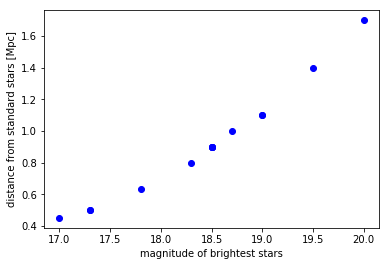

In [8]:


# SOLUTION


# distances for Virgo cluster galaxies
r_Mpc_virgo = [2., 2., 2., 2.]

# recession velocities for Virgo cluster galaxies
v_virgo =[500., 850., 900., 1090.]

plt.plot(m_bstar, r_Mpc, 'bo')
plt.xlabel('magnitude of brightest stars')
plt.ylabel('distance from standard stars [Mpc]')
plt.show()

**Do you see any relationships between apparent magnitude and distance?**

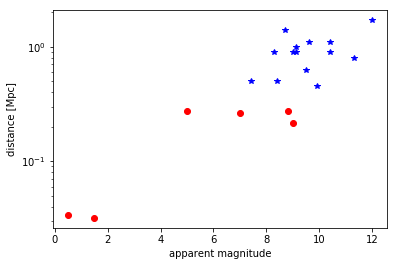

In [9]:
# SOLUTION

plt.semilogy(m_app, r_Mpc, 'b*')
plt.semilogy(m_app_best, r_Mpc_best, 'ro')
plt.xlabel('apparent magnitude')
plt.ylabel('distance [Mpc]')
plt.show()

**What about between absolute magnitude and distance?**


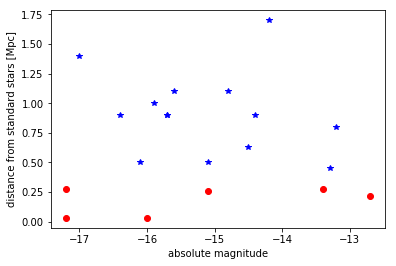

In [10]:
# SOLUTION

plt.plot(M_abs, r_Mpc, 'b*')
plt.plot(M_abs_best, r_Mpc_best, 'ro')
plt.xlabel('absolute magnitude')
plt.ylabel('distance from standard stars [Mpc]')
plt.show()

**In the cell below, reproduce Hubble's plot of recession velocity versus distance:**

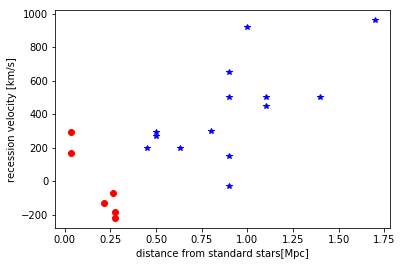

In [11]:
# SOLUTION

plt.plot(r_Mpc, v, 'b*', label='standard stars')
plt.plot(r_Mpc_best, v_best, 'ro', label = 'closest')
plt.ylabel('recession velocity [km/s]')
plt.xlabel('distance from standard stars[Mpc]')
plt.show()


## The Relation between Redshifts and Apparent Magnitudes

In 1931 Edwin Hubble and Milton Humason published the aforementioned work in a paper entitled ["The Velocity-Distance Relation among Extra-Galactic Nebulae"](http://adsabs.harvard.edu/abs/1931ApJ....74...43H), in which they demonstrated for the first time the linear relationship between the velocities and distances of galaxies.  For these more distant galaxies, they didn't have precise distance measurements from standard stars, so they used apparent magnitude as a proxy for distance.  

The strong linear relation shown below and now known as the Hubble-Humason Relation, is clear. The interpretation of this result was that the universe was expanding -- a major paradigm shift in modern cosmology!

![HH_diagram](img/HH_diagram.png)


-------------
# Using SDSS to Verify the Redshift/Velocity-Magnitude Relation 

In the cells below, we will attempt to reproduce this historic result, and in the process explore how redshift correlates with other properties of galaxies in the SDSS database. Let's start by fetching a reasonably large sample of galaxies.  

**Modify the SQL query below to return the redshifts, redshift errors, apparent magnitudes (in all 5 filters), and petrosian radii ("petror90_r") for a large (>500) sample of galaxies with spectroscopic observations.**


In [16]:
query="""
SELECT TOP 500 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.g, p.r, p.i, p.z, s.z as zspec, s.zErr as zspec_err
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr15")
gals = gals.set_index('objId')
gals

,ra,dec,petror90_r,u,g,r,i,z,zspec,zspec_err
objId,,,,,,,,,,
1237651203157590127,198.273606,-0.594685,15.71096,17.99148,16.52407,16.08967,15.78902,15.62116,0.040065,0.000022
1237651203157721163,198.535909,-0.441104,16.66561,16.93318,15.45979,14.76197,14.36404,14.08373,0.039347,0.000010
1237651203157852378,198.947114,-0.462296,20.99608,16.99586,15.33315,14.57367,14.19639,13.95269,0.047261,0.000017
1237651203158179872,199.598134,-0.529519,25.13496,17.62429,15.62594,14.59168,14.16435,13.78257,0.111751,0.000027
1237651203694526509,198.448599,-0.045576,10.08456,16.67869,15.43595,14.88064,14.53470,14.27716,0.039312,0.000011
1237651203695050825,199.679056,-0.178925,10.63681,17.50214,15.54969,14.67166,14.26083,13.91811,0.047581,0.000011
1237651203695116448,199.738921,-0.198310,18.11598,17.27938,15.50455,14.64715,14.19163,13.79359,0.053547,0.000014
1237651203695181846,199.896277,-0.010176,11.13201,18.94578,16.88279,15.84758,15.40166,15.03643,0.110990,0.000024
1237651204231856230,199.538971,0.222846,18.09159,16.93154,15.68594,15.28048,15.03224,14.96881,0.031491,0.000010


### Notes on querying the SDSS database:

A very helpful tutorial on how to use SQL to query the SDSS database can be found [here](http://cas.sdss.org/dr15/en/help/howto/search/searchhowtohome.aspx). 

You can view a cookbook of common SDSS SQL searches [here](http://cas.sdss.org/dr15/en/help/docs/realquery.aspx).

A description of the SDSS database structure and the specific information available in different defined Tables and Views, can be found [here](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx).

A simple search below is written to return results from the first 16 galaxies with spectroscopic information in the SDSS "galaxy" table that meet some specific criteria.  

If you don't recognize the names for the data types listed in the "galaxy" table (e.g., "p.ra", "p.g"), you can look them up [here](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx#&&history=description+Galaxy+V).

In [18]:
# SOLUTION

query="""
SELECT TOP 500 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.err_u, p.g, p.err_g, p.r, p.err_r, p.i, p.err_i, p.z, p.err_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 21.5
"""
gals = CasJobs.executeQuery(query, "dr15")
gals = gals.set_index('objId')



**In the cells below, try to reproduce Hubble and Humason's Redshift-Magnitude relation, using the data you just fetched:**


500
487


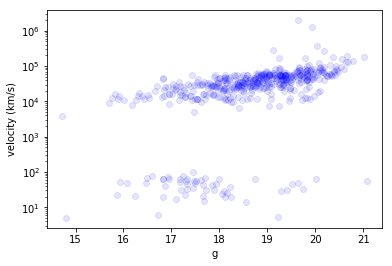

In [19]:
# Let's first remove any negative redshifts (to remove any local galaxies that are moving toward us)

gals2 =gals[gals['z_spec']>0.]
print(len(gals))
print(len(gals2))

# Next, convert your array of redshifts (z) to velocities (v), using the equation:
# z ~ v/c  
# where c is the speed of light (300,000 km/s)
velocity = np.array((300000.*gals['z_spec']))

# Next, plot the velocity versus apparent magnitude in a filter of your choice 
# (you might experiment to see if your choice of filter matters)

# You can plot all of the galaxies in the sample at once, or simply take the mean apparent magnitude at different redshifts...

# By using "semilogy" instead of "plot", you can make a plot that scales logarithmically along the y-axis
plt.semilogy(gals['g'], velocity, 'bo', alpha=0.1)
plt.ylabel('velocity (km/s)')
plt.xlabel('g')
plt.show()

Most of the points lie in a particular region of this plot, but there are some interesting outliers.

Are there any objects in the catalog that *might* not be galaxies?  Revise the SQL query in the cell below to isolate any objects that you think might be suspect, and we'll do a quick visual inspection...

**First, let's isolate a small sample (16) of the objects whose redshifts indicate really small velocities (<1000 km/s):**

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


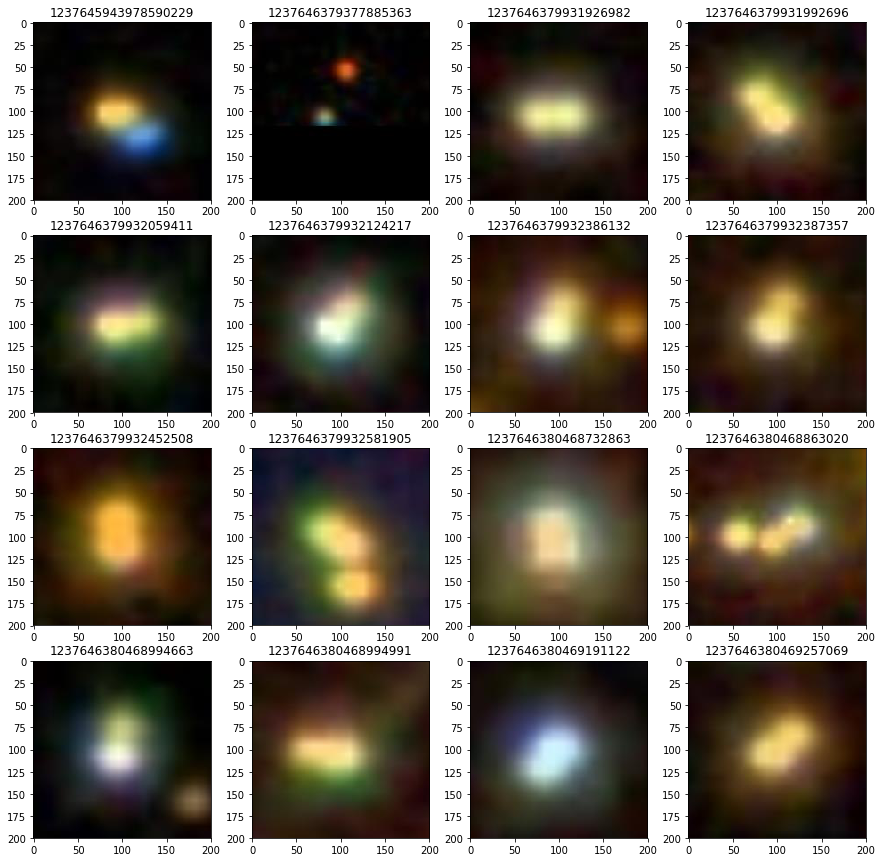

In [20]:
# SOLUTION

query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.err_u, p.g, p.err_g, p.r, p.err_r, p.i, p.err_i, p.z, p.err_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 21.5 and 3000000.*s.z<1000
"""
gals_lowv = CasJobs.executeQuery(query, "dr15")
gals_lowv = gals_lowv.set_index('objId')

#  Below I'm just copying and pasting from our earlier tutorial where we retrieved and plotted a set of SDSS images;
#  No need to worry about the details here, unless you want to change the formatting
#
# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals_lowv)  # I changed the name of my retrieved data to 'gals_lowv', so I've edited this line (and the next) to match
for index,gal in gals_lowv.iterrows():         
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR15')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

OK, those don't really look like normal galaxies.  Most of them appear to be multiple blended stars in the foreground (from our own galaxy). These really shouldn't be included in our plot...! 

Now let's take a look at the ones that seem to have unusually large velocities.  Isolate 16 of them with a new query and display their images below.

Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


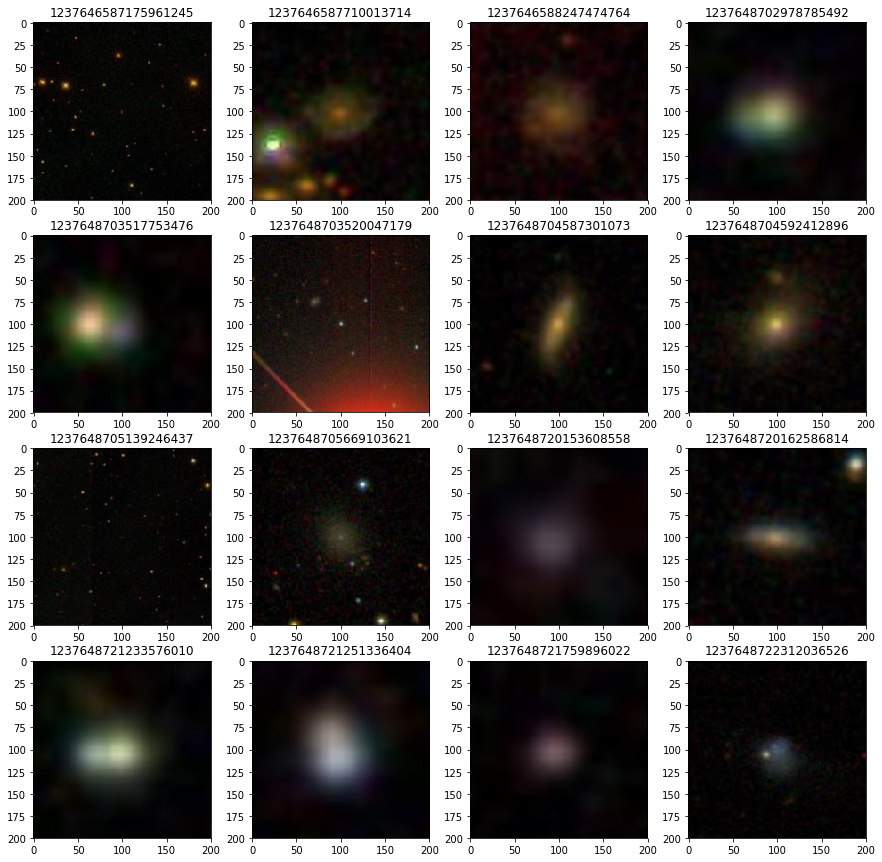

In [21]:
# SOLUTION

query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.err_u, p.g, p.err_g, p.r, p.err_r, p.i, p.err_i, p.z, p.err_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 21.5 and 3000000.*s.z>3000000
"""
gals_highv = CasJobs.executeQuery(query, "dr15")
gals_highv = gals_highv.set_index('objId')

# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals_highv)
for index,gal in gals_highv.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR15')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

Do you see anything weird in these results?

Yes --- these also look like weird artifacts and also blended objects, with a few legitimate galaxies that have unusally bright centers. The latter might be active galactic nuclei!

**If there are some things you don't think are galaxies, try removing them in a fresh query before redrawing the plot:**

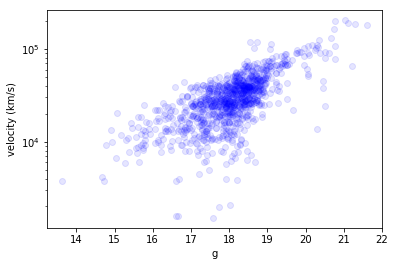

In [22]:
# SOLUTION

query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.err_u, p.g, p.err_g, p.r, p.err_r, p.i, p.err_i, p.z, p.err_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 21.5 and 3000000.*s.z>2000 and 3000000.*s.z<3000000
"""
gals = CasJobs.executeQuery(query, "dr15")
gals = gals.set_index('objId')

velocity = np.array((300000.*gals['z_spec']))

# By using "semilogy" instead of "plot", you can make a plot that scales logarithmically along the y-axis
plt.semilogy(gals['g'], velocity, 'bo', alpha=0.1)
plt.ylabel('velocity (km/s)')
plt.xlabel('g')
plt.show()

**Now let's calculate the best-fit linear regression to this data and add it to the plot...**

The idea is to fit a line, y = mx + c, through these noisy data-points. You can find an example of how to do this [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.lstsq.html)

0.19722643884883623 0.8857594195600719


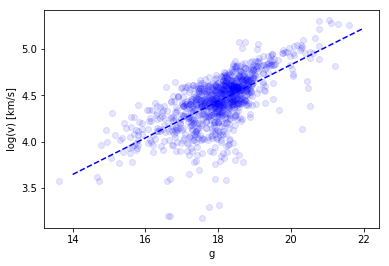

In [23]:
# SOLUTION:

# make an array with the log of the velocities from the table above
log_v = np.array(np.log10(np.array(velocity)))

# add a best-fit linear trendline
#
A = np.vstack([gals['g'], np.ones(len(gals['g']))]).T  # reformat the data as a matrix
m, c = np.linalg.lstsq(A, log_v, rcond=None)[0] # use numpy's linear algebra library to fit a linear least-squared trendline
print(m, c)

# plot the raw data
plt.clf()
plt.plot(gals['g'], log_v, 'bo', alpha=0.1)

# add this best-fit line to the plot
# 
# make a set of x-values to plug into the equation for the best-fit line
x=np.linspace(14,22,len(velocity))
# plot those x-values versus the y-value from the best-fit equation
plt.plot(x, m*x + c, 'b--', label='Fitted line')

# add some labels and show the plot
plt.ylabel('log(v) [km/s]')
plt.xlabel('g')
plt.show()



Shown below are the measurements of galaxy clusters included in the original paper by Hubble and Humason:
![Hubble-Humason Table](img/HH_Table.png)

**Overlay their points on your plot to see if they agree...**

Try overlaying their best-fit linear trendline as well:

$\log_{10} v = (0.202\pm0.007)m+0.472$

where $v$ is the velocity in km/s, and $m$ is the average apparent magnitude of galaxies in the cluster.

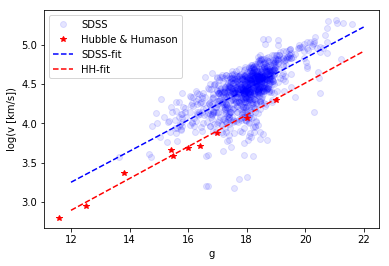

In [24]:

# I've reformatted the table data into arrays, to help get you started...

HH_mag = np.array([12.5, 15.5, 15.4, 16.0, 16.4, 17.0, 18.0, 19.0, 13.8, 11.6])
HH_vel = np.array([890, 3810, 4630, 4820, 5230, 7500, 11800, 19600, 2350, 630])


# take the log of the velocities in the table above
# make an array with the log of the velocities from the table above
HH_vel_log = np.array(np.log10(np.array(HH_vel)))


# plot the data points
plt.plot(gals['g'], log_v, 'bo', alpha=0.1, label='SDSS')
plt.plot(HH_mag, HH_vel_log, 'r*', label='Hubble & Humason')

# add this best-fit line to the plot
x=np.linspace(12,22,len(velocity))
plt.plot(x, m*x + c, 'b--', label='SDSS-fit')
plt.plot(x, 0.202*x + 0.472, 'r--', label='HH-fit')

# Add some labels
plt.ylabel('log(v [km/s])')
plt.xlabel('g')
plt.legend()
plt.show()


The slopes of the best-fit linear trends agree pretty well, but there is a big offset in their amplitude.

### Why is the SDSS trendline so far off of Hubble and Humason?  

Could there be a difference in the way the magnitudes are measured (e.g., a difference in filters used)... or maybe an intrinsic difference in the galaxy samples?

 Try modifying your query to select "de-reddened" magnitudes, which have subtracted off the effects of galactic extinction (from the Milky Way). I'm going to suggest also adding a fundamental photometric limit that the SDSS uses to select similar types of spectroscopic target galaxies (r<17.7). Lastly, let's also require that the data be reliable and put a common sense photometric requirement: g>0

In [25]:

# SOLUTION 

query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.dered_u, p.dered_g, p.dered_r, p.dered_i, p.dered_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.dered_g>0. AND p.dered_r<17.7 AND 3000000.*s.z>2000 and 3000000.*s.z<3000000
"""
gals = CasJobs.executeQuery(query, "dr15")
gals = gals.set_index('objId')

velocity = np.array((300000.*gals['z_spec']))


0.2021946435490627 0.8412672817992769


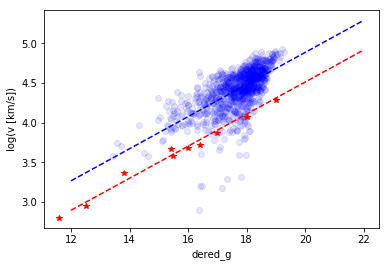

In [26]:
from math import log10
log_v = []
for v in velocity:
    log_v.append(log10(v))
    
A = np.vstack([gals['dered_g'], np.ones(len(gals['dered_g']))]).T
m, c = np.linalg.lstsq(A, log_v, rcond=None)[0]
print(m, c)

# add this best-fit line to the plot
plt.clf()
plt.plot(gals['dered_g'], log_v, 'bo', alpha=0.1, label = 'SDSS')
plt.plot(HH_mag, HH_vel_log, 'r*', label='Hubble & Humason')
x=np.linspace(12,22,len(velocity))
plt.plot(x, m*x + c, 'b--', label='SDSS-fit')
plt.plot(x, 0.202*x + 0.472, 'r--', label='HH-fit')
plt.ylabel('log(v [km/s])')
plt.xlabel('dered_g')
plt.show()

Here you can see that some of the higher-velocity (higher-redshift) and fainter galaxies have been removed from the SDSS sample, and there's also a sharper limit to the apparent brightness of the galaxies on the faint end.  

This still hasn't closed the gap between the two measurements, however.  

It's possible that our choice of filter could be one of the issues leading to this gap.  Let's try converting the SDSS magnitudes to a standard visual "V"-band magnitude, as calucated by Lupton (2005):

$V = g - 0.5784*(g - r) - 0.0038$

If you're curious to try more, a number of conversions to other filters can be found [here](https://classic.sdss.org/dr7/algorithms/sdssUBVRITransform.html).   


0.1850413341488044 1.232685127118768


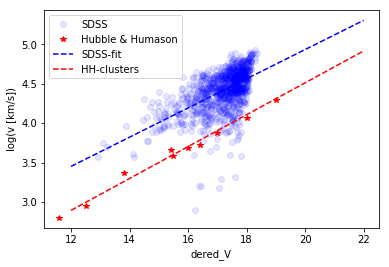

In [27]:
# Let's calculate the magnitude converted to the V filter
V = np.array(gals['dered_g'] - 0.5784*(gals['dered_g'] - gals['dered_r']) - 0.0038)
    
# and re-fit the linear trend
A = np.vstack([V, np.ones(len(V))]).T
V_m, V_c = np.linalg.lstsq(A, log_v, rcond=None)[0]
print(V_m, V_c)


# add this best-fit line to the plot
plt.clf()
plt.plot(V, log_v, 'bo', alpha=0.1, label = 'SDSS')

plt.plot(HH_mag, HH_vel_log, 'r*', label='Hubble & Humason')
x=np.linspace(12,22,len(velocity))
plt.plot(x, V_m*x + V_c, 'b--', label='SDSS-fit')
plt.plot(x, 0.202*x + 0.472, 'r--', label='HH-clusters')

plt.ylabel('log(v [km/s])')
plt.xlabel('dered_V')
plt.legend()
plt.show()

Well, that didn't really seem to make much of a difference.  It seems likely that the real difference lies in the galaxies themselves, and how they were selected.

--------------------------

### Is it possible that Hubble & Humason's use of cluster galaxies could be introducing some sort of environmental bias?

In 1934, Hubble and Humason [published an update](https://www.pnas.org/content/pnas/20/5/264.full.pdf) to their findings, which used isolated galaxies instead of galaxies in clusters.  The data are provided below:

![table](img/HH_1934_table.png)

The best-fit linear approximation to this velocity-magnitude relation was reported to be: 

$\log_{10} v = 0.2m+0.71$

where $v$ represents velocity in km/s, and $m$ represents apparent magnitude.

**Try adding this trendline to your previous plot of SDSS data below... How does it agree?**

0.2021946435490627 0.8412672817992769


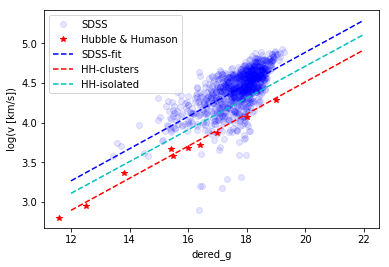

In [28]:
    
A = np.vstack([gals['dered_g'], np.ones(len(gals['dered_g']))]).T
m, c = np.linalg.lstsq(A, log_v, rcond=None)[0]
print(m, c)


# add this best-fit line to the plot
plt.clf()
plt.plot(gals['dered_g'], log_v, 'bo', alpha=0.1, label = 'SDSS')
plt.plot(HH_mag, HH_vel_log, 'r*', label='Hubble & Humason')
x=np.linspace(12,22,len(velocity))
plt.plot(x, m*x + c, 'b--', label='SDSS-fit')
plt.plot(x, 0.202*x + 0.472, 'r--', label='HH-clusters')

# adding Hubble & Humason's trend for isolated galaxies here
plt.plot(x, 0.2*x + 0.71, 'c--', label='HH-isolated') 

plt.ylabel('log(v [km/s])')
plt.xlabel('dered_g')
plt.legend()
plt.show()

Well, Hubble & Humason's isolated galaxy data do agree a little better with the SDSS. _But what is the reason for this shift?_  

Hubble and Humason attributed this result (that isolated galaxies at a particular distance were nearly one magnitude brighter than galaxies in clusters at similar distances) to a bias in their observations, which were apparent-magnitude limited (not absolute-magnitude limited).  A decade earlier, the Swedish astronomer Gunnar Malmquist had demonstrated that in an apparent magnitude-limited survey, one will always be biased toward observing objects with greater than average absolute magnitude. This persistent bias in astronomical data is now referred to as [Malmquist Bias](https://en.wikipedia.org/wiki/Malmquist_bias).

Consider this helpful analogy.  Imagine you are driving toward a city from a great distance surrounded by flat cornfields (e.g., driving to Chicago from Rockford, ~ 60 miles away).  At the greatest distances that you can see, only the tallest buildings (e.g., the Sears Tower and other skyscrapers from downtown) will be detectable at the limited resolution of your eye.  Thus, your accounting of objects at that distance will be biased to only the tallest ones, which you can resolve.  Similarly, Malmquist bias works in such a way that at the distant edges of a survey that is limited by some finite apparent magnitude, the objects at the edge of your survey detection limits will be the ones that have the greatest intrinsic brightness (i.e., absolute magnitude) for their distance. 

A figure illustrating this bias effect is shown below ("The Realm of the Nebulae" - Edwin Hubble, 1936, pp.174-175)

![Malmquist](img/malmquist.png)

Hubble and Humason recognized that by applying an apparent magnitude limit when selecting their isolated galaxies, their distant galaxies would be biased, such that they were intrinsically brighter than average for their redshift.

We should expect this bias to also be pervasive in the SDSS!  Later in the course we will have more time to think about ways of correcting for this kind of bias.  But for now, let's investigate a few other observable trends and limitations in the SDSS galaxy data.

------------------------------------
# Understanding the limits of your data

As we spend the semester exploring SDSS data and trying to better understand the properties of stars, galaxies, and the universe at large, it's important to know our limits.  Let's start by exploring the spectroscopic galaxy sample data that you've just fetched.

### 1. The Redshift Distribution

What is the distribution of redshifts in the sample?  These kinds of questions are best answered by plotting a histogram...

**YOUR TURN:**  I'll get you started with some code to modify.  I've chosen to start off by binning the data in 100 evenly spaced bins, ranging from 0 to 10.  Normal galaxies in the SDSS (ones that aren't extra-luminous due to an active galatic nucleus), typically are limited to z<1.  Any outliers (low-redshift stars, high-redshift AGN) should have been removed by earlier modifications to the query.  If not, make sure you crop them out now.

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

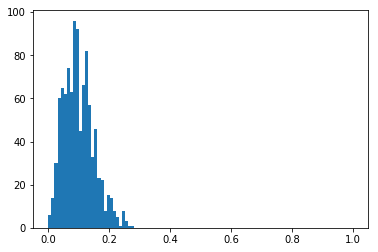

In [30]:
import numpy as np

# modify the limits and spacing of the histogram binning below to better view the galaxy redshift distribution
bins = np.linspace(0,1,100) 
print(bins)

plt.hist(gals['z_spec'], bins)
plt.show()

By interpreting the plot above, you can start to get a feel for the redshift distribution of the galaxy sample. 

You can also make a few calculations to describe the shape of the galaxy's redshift distribution:


In [34]:
# Add your code to calculate the mean redshift here
print("mean redshift: ", round(np.mean(gals['z_spec']),5))

# Add your code to calculate the median redshift here
print("median redshift: ", round(np.median(gals['z_spec']),5))

# Add your code to calculate the minimum and maximum redshift here
print("maximum redshift: ", np.max(gals['z_spec']))


mean redshift:  0.10003
median redshift:  0.09362
maximum redshift:  0.2796753


### 2. Redshift versus Size

Now let's make a plot to explore the relationship between galaxy redshift and size, using the data you've just fetched.  

Remember that the angular size of each galaxy (in units of arcseconds on the sky) is denoted with the 'petro90_r' column in the galaxy table. 

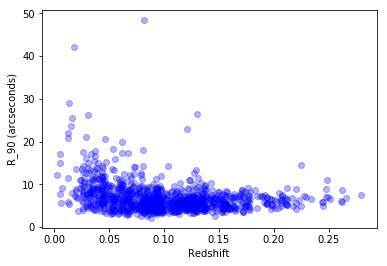

In [41]:
plt.plot(gals['z_spec'], gals['petror90_r'], 'bo', alpha=0.3)
plt.xlabel('Redshift')
plt.ylabel('R_90 (arcseconds)')
plt.show()

#### Comment on what you see here.... What did you expect before you made this plot?  Do the observations match your expectations?  Why or why not?

The only galaxies with large angular sizes are found at very low redshift, as expected.  If all galaxies were the same physical size, they would appear smaller at greater distances from the observer.  The galaxies with reasonably large angular size at z>0.2 are puzzling, so we'll take a closer look below:



Getting image 1 of 16...
Getting image 2 of 16...
Getting image 3 of 16...
Getting image 4 of 16...
Getting image 5 of 16...
Getting image 6 of 16...
Getting image 7 of 16...
Getting image 8 of 16...
Getting image 9 of 16...
Getting image 10 of 16...
Getting image 11 of 16...
Getting image 12 of 16...
Getting image 13 of 16...
Getting image 14 of 16...
Getting image 15 of 16...
Getting image 16 of 16...
Plotting images...


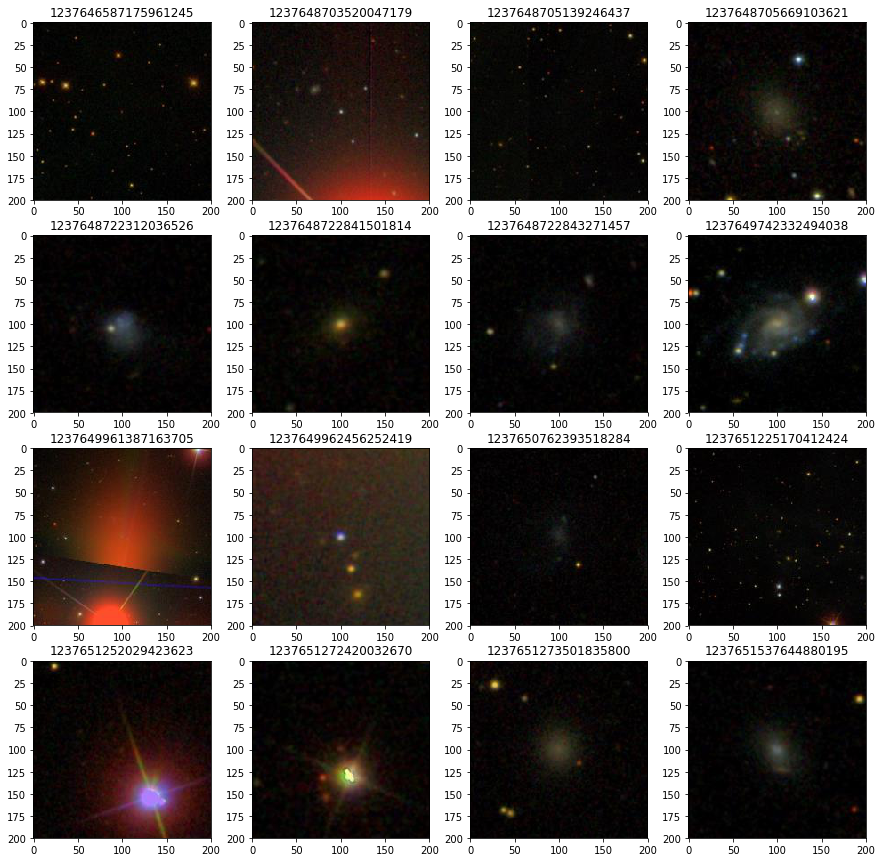

In [43]:
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.u, p.err_u, p.g, p.err_g, p.r, p.err_r, p.i, p.err_i, p.z, p.err_z, s.z as z_spec, s.zErr
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 21.5 and 3000000.*s.z>3000000 and s.z>0.2 and p.petror90_r>10.0
"""
gals_highzlarge = CasJobs.executeQuery(query, "dr15")
gals_highzlarge = gals_highzlarge.set_index('objId')

# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals_highzlarge)
for index,gal in gals_highzlarge.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR15')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

Sure enough, it looks like contamination from bright, saturated stars is foiling the image reduction pipeline, masquerading at times like large extended objects.  There are also some cases of a bright star or quasar being close to a galaxy on the sky, and having its light contribute to a larger petrosian radius (the radius enclosing half of an object's flux.  There also appears to be a cluster or two in the mix.  So yes, maybe these are not on the whole individual galaxies with z>0.2 and large sizes.

### 3. Redshift versus Color

When a galaxy is redshifted its spectroscopic features are shifted to longer (i.e., redder) wavelengths. Does this reddening actually show up in the photometric data (i.e., the characterization of galaxy color as the difference between two apparent magnitudes)?  Pick a pair of SDSS filters and explore graphically how the color changes with redshift.

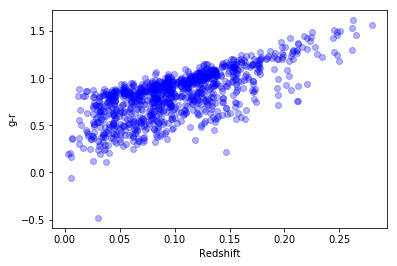

In [45]:
gmr = gals['dered_g']-gals['dered_r']

plt.plot(gals['z_spec'], gmr, 'bo', alpha=0.3)
plt.xlabel('Redshift')
plt.ylabel('g-r')
plt.show()

#### Comment on what you see here....

Yes -- it does appear that the galaxies get redder (larger in 'g-r' color) with increasing redshift!

 
 ### 4. Redshift versus Morphology
 
 You may have already thought about the fact that any relation between galaxy color and redshift should be complicated by the fact that galaxies aren't all the same color. In the modern universe, most massive galaxies fall into one of two major populations: blue spirals and red ellipticals.  A changing mix of these types in our survey data with redshift might also affect our measured relation between color and redshift.  In order to explore this possibility, we'll need to get information about the shape (i.e., morphology) of the SDSS galaxies.
 
 The SDSS DR8 includes data on visual galaxy morphologies from the 
 [Galaxy Zoo](https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/) project. Galaxy Zoo is a web-based project
 that used the collective efforts of about 100,000 volunteer 
 citizen scientists to classify more than one million
 SDSS DR7 Main Galaxy Sample (MGS) galaxies.
 Full details on the classification process, including the operation
 of the site and estimates of classification accurary, are given in
 [Lintott et al. (2008)](http://adsabs.harvard.edu/abs/2008MNRAS.389.1179L).

Galaxy Zoo data are contained in tables that begin with "zoo"
in the [Table schema](http://skyserver.sdss.org/dr15/en/help/browser/browser.aspx#&&history=shortdescr+Tables+U). For each galaxy, available data includes its
SDSS object ID and weighted probabilities for each of six different
morphological classifications based on counts of volunteer "votes".
Full details on what data the Galaxy Zoo catalog contains are given
in [Lintott et al. (2010)](http://adsabs.harvard.edu/abs/2011MNRAS.410..166L).

The query below finds the weighted probability that a given galaxy has each of the following six morphological classifications:

elliptical: 'p_el'

spiral (clockwise winding):  'p_cw' 

spiral (counter-clockwise winding): 'p_acw' 

edge-on: 'p_edge'

merger: 'p_mg'

undetermined: 'p_dk'

In [46]:

# This example query finds 100 galaxies that have spectra, clean photometry,
# at least 10 Galaxy Zoo volunteer votes, and at least an 80% probability
# of being clockwise spirals.

query="""
SELECT TOP 100 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, s.z as z_spec, s.zErr, zns.nvote, zns.p_el as elliptical, zns.p_cw as spiralclock, zns.p_acw as spiralanticlock, zns.p_edge as edgeon, zns.p_dk as dontknow, zns.p_mg as merger
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zns.nvote >= 10 and zns.p_cw > 0.8
"""
zoo_gals = CasJobs.executeQuery(query, "dr15")
zoo_gals = zoo_gals.set_index('objid')
zoo_gals

,ra,dec,petror90_r,dered_g,z_spec,zErr,nvote,elliptical,spiralclock,spiralanticlock,edgeon,dontknow,merger
objid,,,,,,,,,,,,,
1237668650926342749,241.829163,-0.443972,9.176703,17.18769,0.074706,0.000012,20,0.000,0.850,0.050,0.100,0.000,0.000
1237668650926539340,242.274702,-0.574642,7.471252,16.53492,0.056719,0.000008,32,0.031,0.906,0.000,0.062,0.000,0.000
1237648673458684355,244.496791,-0.498398,9.355639,16.13657,0.050477,0.000009,23,0.000,1.000,0.000,0.000,0.000,0.000
1237655560403354055,248.120390,-0.478861,7.999845,16.81796,0.070390,0.000023,40,0.075,0.800,0.000,0.100,0.000,0.025
1237648704064454738,238.736718,-0.209378,11.107280,15.60193,0.042800,0.000007,37,0.000,0.946,0.054,0.000,0.000,0.000
1237648673995686549,244.875590,-0.038526,12.179800,16.53927,0.079218,0.000027,35,0.000,0.971,0.029,0.000,0.000,0.000
1237655550206804790,247.424991,-0.167082,8.663761,17.34978,0.044132,0.000015,52,0.038,0.808,0.019,0.058,0.019,0.058
1237655554497315264,247.530807,-0.193460,9.905840,15.91343,0.046768,0.000025,31,0.032,0.935,0.000,0.000,0.000,0.032
1237668569320980980,240.498466,0.319765,9.797406,17.35759,0.041010,0.000021,22,0.000,0.818,0.000,0.182,0.000,0.000


**Modify the query above to fetch separate samples of spirals and ellipticals.  Then, plot the color versus redshift for each sample.**

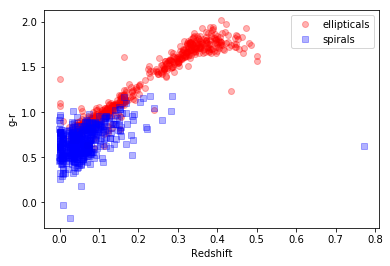

In [50]:
# This example query finds 100 galaxies that have spectra, clean photometry,
# at least 10 Galaxy Zoo volunteer votes, and at least an 80% probability
# of being clockwise spirals.

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr, zns.nvote, zns.p_el as elliptical, zns.p_cw as spiralclock, zns.p_acw as spiralanticlock, zns.p_edge as edgeon, zns.p_dk as dontknow, zns.p_mg as merger
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zns.nvote >= 10 and zns.p_cw > 0.8 and s.z<1
"""
zoo_gals_sp = CasJobs.executeQuery(query, "dr15")
zoo_gals_sp = zoo_gals_sp.set_index('objid')

query="""
SELECT TOP 500 p.objid, p.ra,p.dec,p.petror90_r, p.dered_g, p.dered_r, s.z as z_spec, s.zErr, zns.nvote, zns.p_el as elliptical, zns.p_cw as spiralclock, zns.p_acw as spiralanticlock, zns.p_edge as edgeon, zns.p_dk as dontknow, zns.p_mg as merger
  FROM Galaxy as p
   JOIN ZooNoSpec AS zns ON p.objid = zns.objid
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.clean=1 and zns.nvote >= 10 and zns.p_el > 0.8 and s.z<1
"""
zoo_gals_ell = CasJobs.executeQuery(query, "dr15")
zoo_gals_ell = zoo_gals_ell.set_index('objid')

gmr_ell = zoo_gals_ell['dered_g']-zoo_gals_ell['dered_r']
gmr_sp = zoo_gals_sp['dered_g']-zoo_gals_sp['dered_r']

plt.plot(zoo_gals_ell['z_spec'], gmr_ell, 'ro', label='ellipticals', alpha=0.3)
plt.plot(zoo_gals_sp['z_spec'], gmr_sp, 'bs', label='spirals', alpha=0.3)

plt.xlabel('Redshift')
plt.ylabel('g-r')
plt.legend()
plt.show()

### Include your comments on your results here.

You might notice that the spiral galaxies fall off in number in the sample, at redshifts above z~0.2.  This may be a real feature of the universe... or it could be selection effects.  Think more about the angular sizes of galaxies and how they decrease with redshift. Also recall that this particular sample of galaxies is a subset of the SDSS spectroscopic galaxy sample, which has been categorized by Galaxy Zoo volunteers.  Do you think it might be harder to identify a spiral structure in a galaxy at higher redshifts?  For a survey with fixed resolution, this is certainly the case.  Another possibility is that elliptical galaxies could be intrinsically more luminous than spirals. If that's the case, then in a magnitude-limited survey we would collect many more elliptical galaxies at higher redshifts than spirals.  We will have an opportunity to explore these hypotheses later in the course!